In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


In [34]:

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [3]:
df_you = pd.read_csv("d:/dataset/USvideos.csv")

In [4]:
df_you.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Looking some information of the data

In [5]:
df_you.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [6]:
len(df_you.columns)

16

In [7]:
df_you.shape

(40949, 16)

In [8]:
df_you.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [9]:
df_you.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [10]:
df_you.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [11]:
df_you.values

array([['2kyS6SvSYSE', '17.14.11', 'WE WANT TO TALK ABOUT OUR MARRIAGE',
        ..., False, False,
        "SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\\nWIDE LENS; http://tinyurl.com/jkfcm8t\\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\\nSMALL CAMERA; http://tinyurl.com/hrrzhor\\nMICROPHONE; http://tinyurl.com/zefm4jy\\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\\

In [12]:
df_you.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

# checking  Views, likes, dislikes and comment counts have a normal distribuition

In [13]:
df_you['likes_log'] = np.log(df_you['likes'] + 1)
df_you['views_log'] = np.log(df_you['views'] + 1)
df_you['dislikes_log'] = np.log(df_you['dislikes'] + 1)
df_you['comment_log'] = np.log(df_you['comment_count'] + 1)


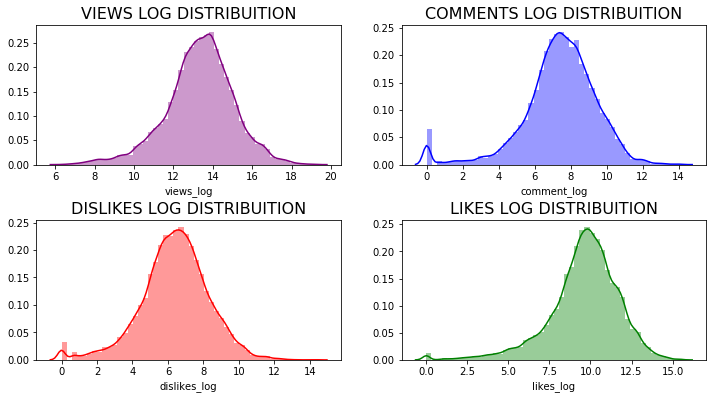

In [14]:
plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df_you['views_log'] , color ='purple')
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_you['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_you['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_you['comment_log'], color = 'blue')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [15]:
df_you['views'].head(3)

0     748374
1    2418783
2    3191434
Name: views, dtype: int64

In [16]:
print("Views quantiles")
print(df_you['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_you['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_you['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_you['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64

Likes quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64


In [17]:
df_you['category_name'] = np.nan


In [18]:
df_you.loc[(df_you["category_id"] == 1),"category_name"] = 'Film and Animation'
df_you.loc[(df_you["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_you.loc[(df_you["category_id"] == 10),"category_name"] = 'Music'
df_you.loc[(df_you["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_you.loc[(df_you["category_id"] == 17),"category_name"] = 'Sport'
df_you.loc[(df_you["category_id"] == 19),"category_name"] = 'Travel and Events'
df_you.loc[(df_you["category_id"] == 20),"category_name"] = 'Gaming'
df_you.loc[(df_you["category_id"] == 22),"category_name"] = 'People and Blogs'
df_you.loc[(df_you["category_id"] == 23),"category_name"] = 'Comedy'
df_you.loc[(df_you["category_id"] == 24),"category_name"] = 'Entertainment'
df_you.loc[(df_you["category_id"] == 25),"category_name"] = 'News and Politics'
df_you.loc[(df_you["category_id"] == 26),"category_name"] = 'How to and Style'
df_you.loc[(df_you["category_id"] == 27),"category_name"] = 'Education'
df_you.loc[(df_you["category_id"] == 28),"category_name"] = 'Science and Technology'
df_you.loc[(df_you["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_you.loc[(df_you["category_id"] == 25),"category_name"] = 'News & Politics'

# Looking the Views, likes, dislikes distribuition by category_name's

Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


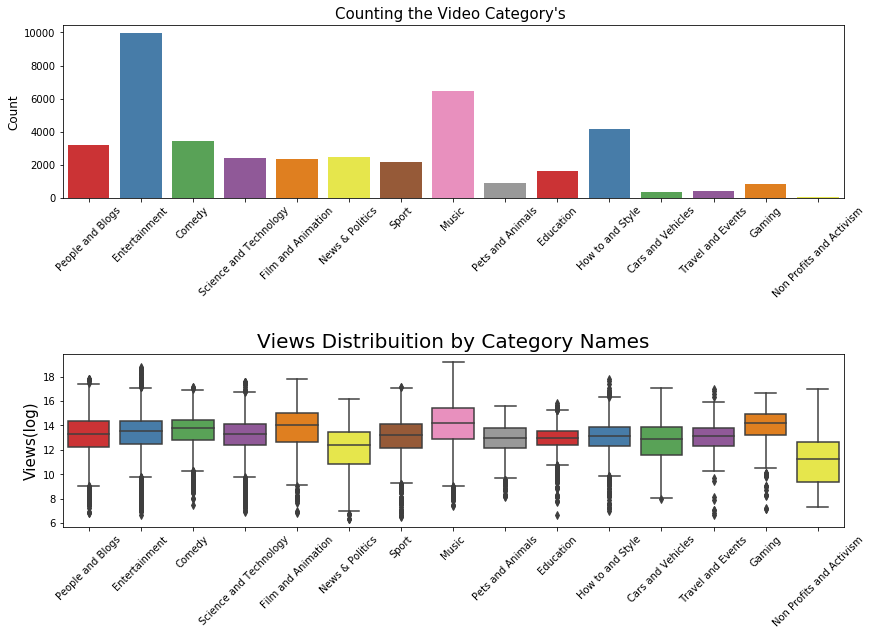

In [20]:
print("Category Name count")
print(df_you.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df_you, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df_you, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

# Looking the Views, likes, dislikes distribuition by category_name's

# likes distribuition by category_name

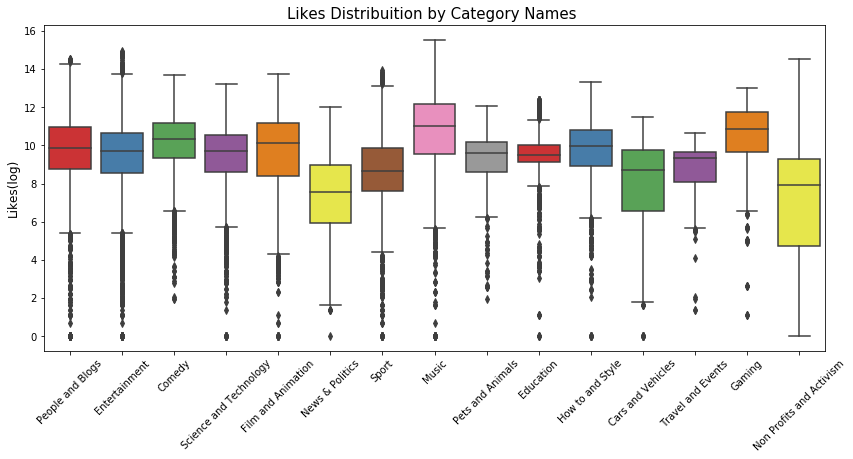

In [21]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df_you, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

# dislikes distribuition by category_names

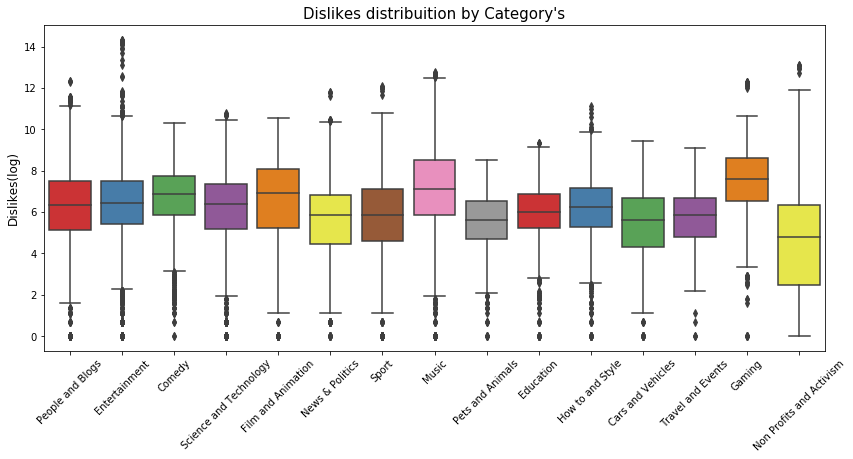

In [22]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=df_you, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

# comments distribuition by category_name

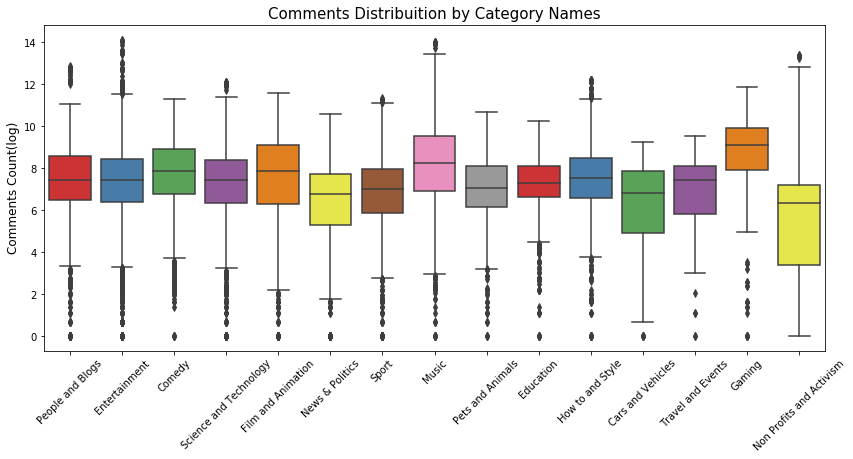

In [23]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df_you, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

# creating some variables to analyse the percent of likes, dislikes, comment by each category to discover what category have the highest engagement

In [24]:
df_you['like_rate'] =  df_you ['likes'] / df_you['views'] * 100
df_you['dislike_rate'] =  df_you ['dislikes'] / df_you['views'] * 100
df_you['comment_rate'] =  df_you ['comment_count'] / df_you['views'] * 100

# Rate Distributions 

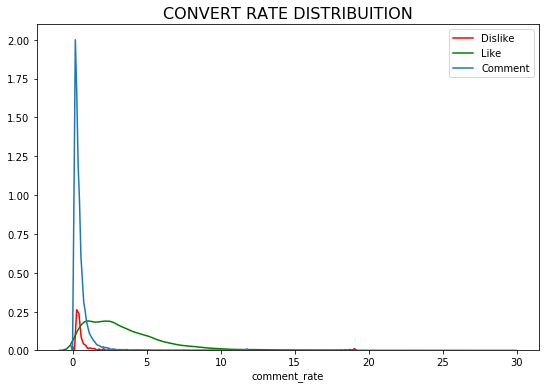

In [25]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(df_you['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df_you['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(df_you['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

# Distribution graph

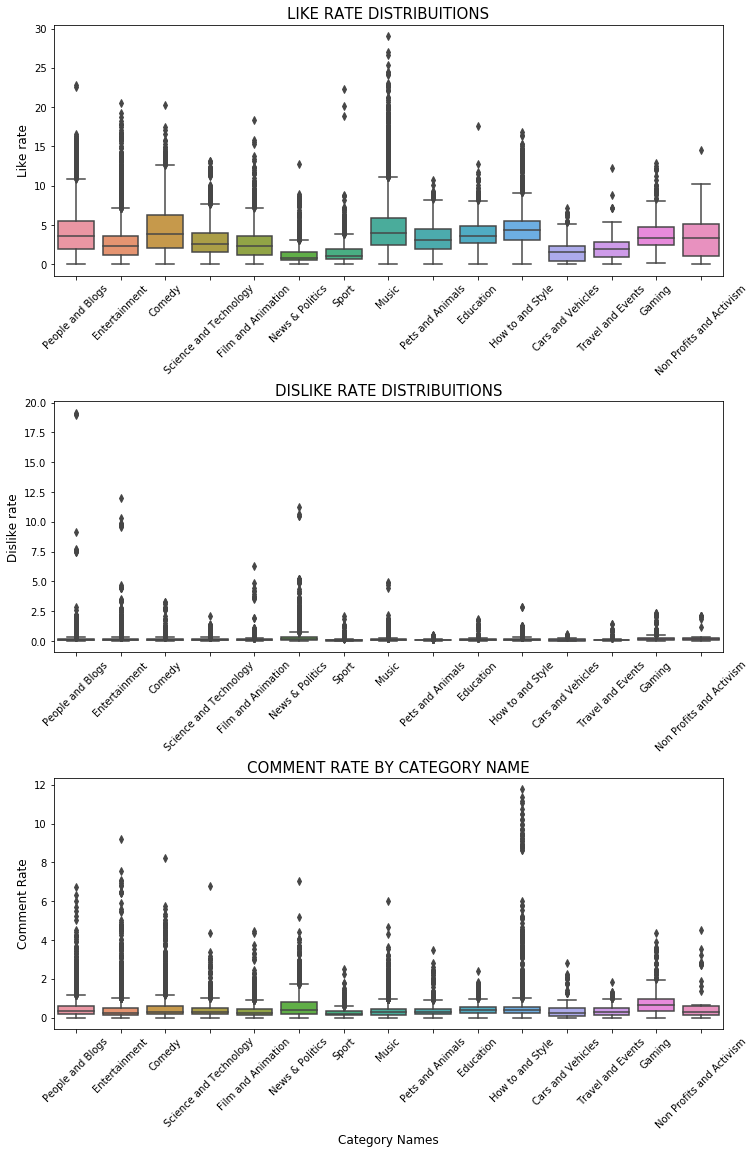

In [26]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=df_you)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUITIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=df_you)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUITIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=df_you)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

# Looking through the others categoricals variables
# .We have the variables:
# .Comments Disable
# .Rating disable
# .Video error

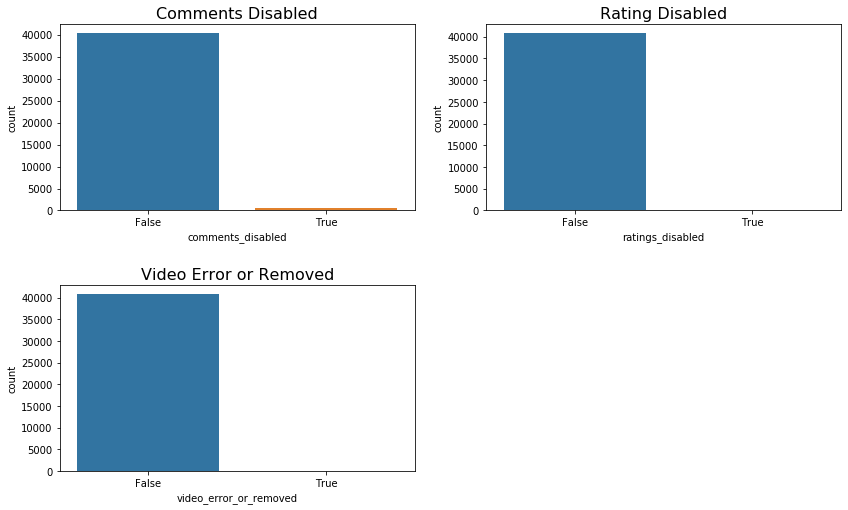

In [27]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df_you)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df_you)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df_you)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()


In [28]:
df_you['comments_disabled'].head(2)

0    False
1    False
Name: comments_disabled, dtype: bool

In [29]:
df_you['views_log'].head(3)

0    13.525659
1    14.698775
2    14.975981
Name: views_log, dtype: float64

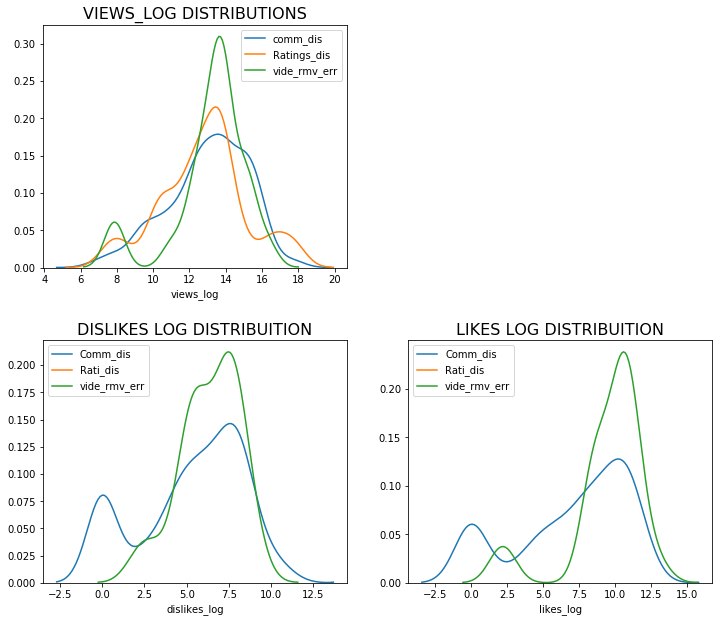

In [36]:
plt.figure(figsize =(12,10))

plt.subplot(221)
g1 =sns.distplot(df_you[df_you['comments_disabled'] == True]['views_log'],hist=False, label='comm_dis')

g1 = sns.distplot(df_you[df_you['ratings_disabled']== True]['views_log'] ,hist=False ,label='Ratings_dis')
g1 =sns.distplot(df_you[df_you['video_error_or_removed'] ==True]['views_log'] ,hist=False ,label ='vide_rmv_err')
g1.set_title('VIEWS_LOG DISTRIBUTIONS' ,fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_you[df_you['comments_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Comm_dis')
g3 = sns.distplot(df_you[df_you['ratings_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Rati_dis')
g3 = sns.distplot(df_you[df_you['video_error_or_removed'] == True]['dislikes_log'], 
                  hist=False, label='vide_rmv_err')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_you[df_you['comments_disabled'] == True]['likes_log'], 
                  hist=False, label='Comm_dis')
g2 = sns.distplot(df_you[df_you['ratings_disabled'] == True]['likes_log'], 
                  hist=False, label='Rati_dis')
g2 = sns.distplot(df_you[df_you['video_error_or_removed'] == True]['likes_log'], 
                  hist=False, label='vide_rmv_err')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 0.9)
plt.legend()
plt.show()

# Analysing the Correlation Matrix of the numerical variables

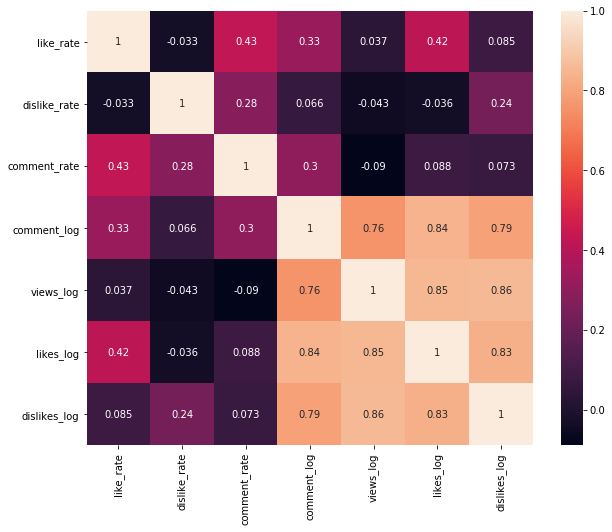

In [41]:
plt.figure(figsize=(10,8))

sns.heatmap(df_you[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show()

# creating some features from texts using Title and Tags columns

In [48]:
#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

In [50]:
#Setting the stopwords
import nltk
nltk.download('stopwords')
eng_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [51]:
#Word count in each comment:
df_you['count_word']=df_you["title"].apply(lambda x: len(str(x).split()))
df_you['count_word_tags']=df_you["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
df_you['count_unique_word']=df_you["title"].apply(lambda x: len(set(str(x).split())))
df_you['count_unique_word_tags']=df_you["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_you['count_letters']=df_you["title"].apply(lambda x: len(str(x)))
df_you['count_letters_tags']=df_you["tags"].apply(lambda x: len(str(x)))

#punctuation count
df_you["count_punctuations"] =df_you["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_you["count_punctuations_tags"] =df_you["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_you["count_words_upper"] = df_you["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_you["count_words_upper_tags"] = df_you["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_you["count_words_title"] = df_you["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_you["count_words_title_tags"] = df_you["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_you["count_stopwords"] = df_you["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_you["count_stopwords_tags"] = df_you["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df_you["mean_word_len"] = df_you["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_you["mean_word_len_tags"] = df_you["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [52]:
#derived features
#Word count percent in each comment:
df_you['word_unique_percent']=df_you['count_unique_word']*100/df_you['count_word']
df_you['word_unique_percent_tags']=df_you['count_unique_word_tags']*100/df_you['count_word_tags']

#Punct percent in each comment:
df_you['punct_percent']=df_you['count_punctuations']*100/df_you['count_word']
df_you['punct_percent_tags']=df_you['count_punctuations_tags']*100/df_you['count_word_tags']

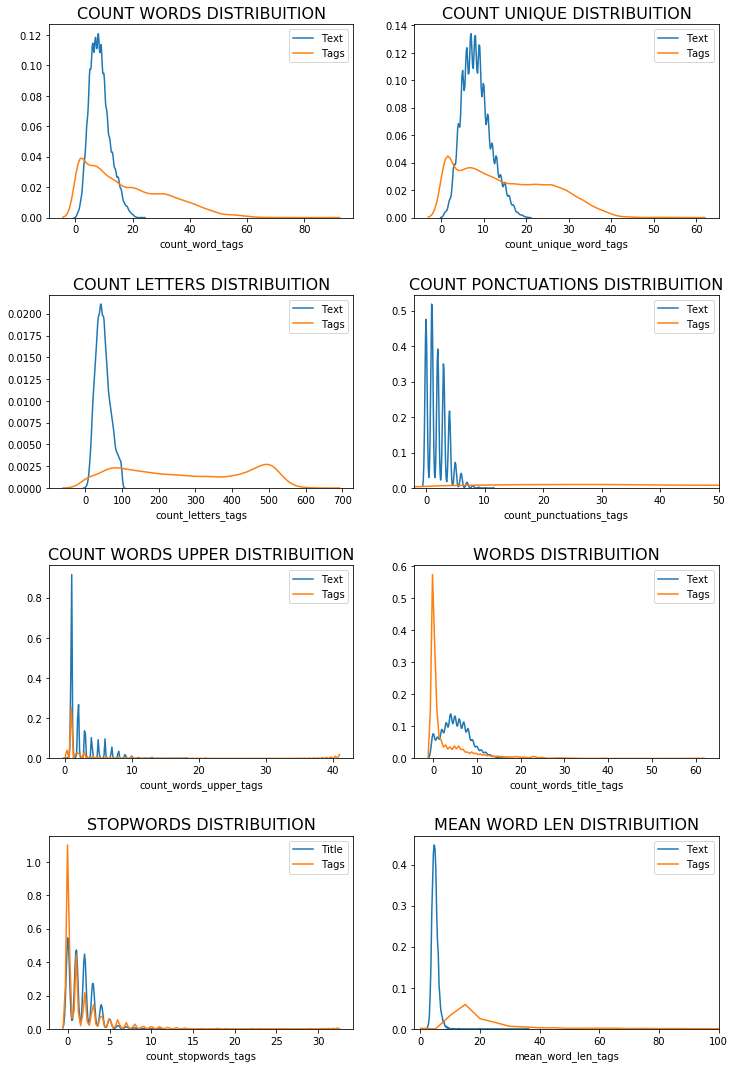

In [53]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df_you['count_word'], hist=False, label='Text')
g1 = sns.distplot(df_you['count_word_tags'], hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(df_you['count_unique_word'],hist=False, label='Text')
g2 = sns.distplot(df_you['count_unique_word_tags'], hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(df_you['count_letters'], hist=False, label='Text')
g3 = sns.distplot(df_you['count_letters_tags'], hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(df_you["count_punctuations"], hist=False, label='Text')
g4 = sns.distplot(df_you["count_punctuations_tags"], hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(df_you["count_words_upper"] ,hist=False, label='Text')
g5 = sns.distplot(df_you["count_words_upper_tags"] , hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(df_you["count_words_title"], hist=False, label='Text')
g6 = sns.distplot(df_you["count_words_title_tags"], hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(df_you["count_stopwords"], hist=False, label='Title')
g7 = sns.distplot(df_you["count_stopwords_tags"], hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(df_you["mean_word_len"], hist=False, label='Text')
g8 = sns.distplot(df_you["mean_word_len_tags"], hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

# Have the Punctuations title and tags any relation with views, likes, dislikes comments?


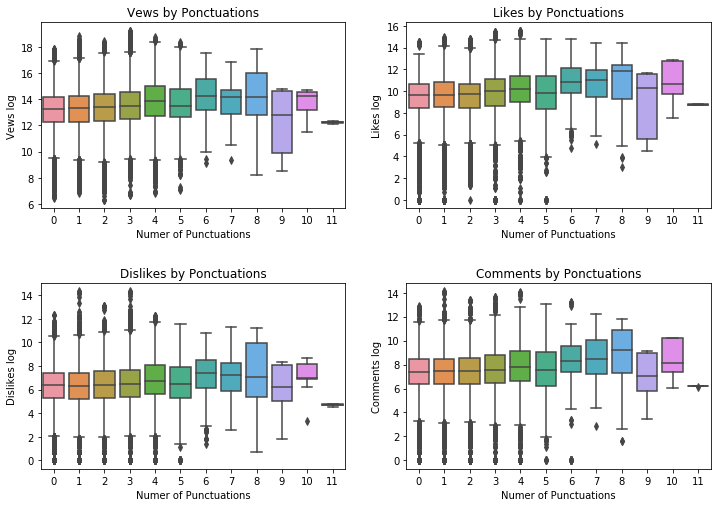

In [54]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations', y='views_log',data=df_you)
g.set_title("Vews by Ponctuations")
g.set_xlabel("Numer of Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations', y='likes_log',data=df_you)
g1.set_title("Likes by Ponctuations")
g1.set_xlabel("Numer of Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations', y='dislikes_log',data=df_you)
g2.set_title("Dislikes by Ponctuations")
g2.set_xlabel("Numer of Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations', y='comment_log',data=df_you)
g3.set_title("Comments by Ponctuations")
g3.set_xlabel("Numer of Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

# The same view using Tags punctuations values

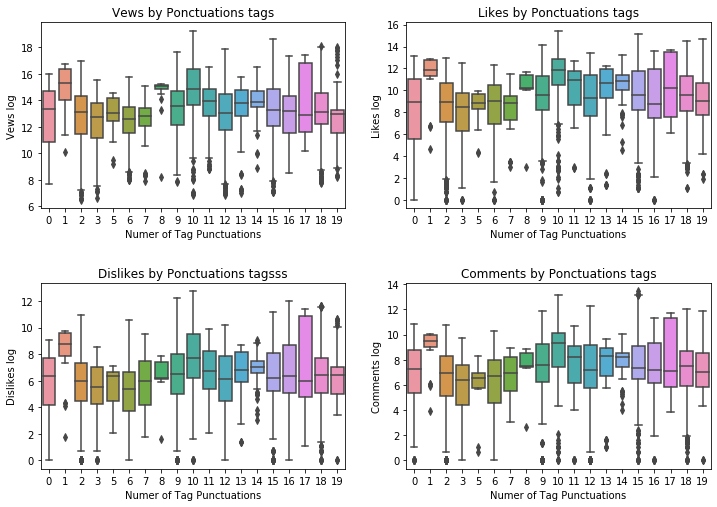

In [55]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations_tags', y='views_log',data=df_you[df_you['count_punctuations_tags'] < 20])
g.set_title("Vews by Ponctuations tags")
g.set_xlabel("Numer of Tag Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations_tags', y='likes_log',data=df_you[df_you['count_punctuations_tags'] < 20])
g1.set_title("Likes by Ponctuations tags")
g1.set_xlabel("Numer of Tag Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations_tags', y='dislikes_log',data=df_you[df_you['count_punctuations_tags'] < 20])
g2.set_title("Dislikes by Ponctuations tagsss")
g2.set_xlabel("Numer of Tag Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations_tags', y='comment_log',data=df_you[df_you['count_punctuations_tags'] < 20])
g3.set_title("Comments by Ponctuations tags")
g3.set_xlabel("Numer of Tag Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

#  verify the correlation of title and tags values with views
exploring the Correlation matrix to see if have any interesting relation

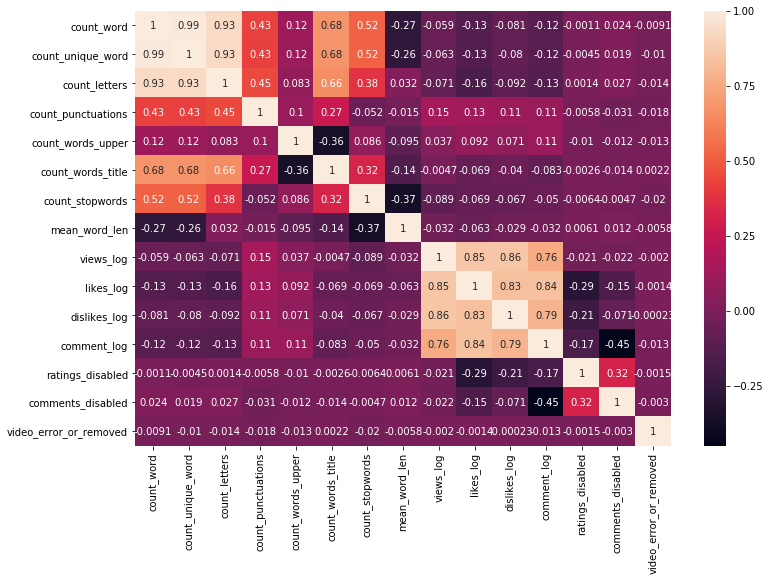

In [56]:
plt.figure(figsize = (12,8))

sns.heatmap(df_you[['count_word', 'count_unique_word','count_letters',
                     "count_punctuations","count_words_upper", "count_words_title", 
                     "count_stopwords","mean_word_len", 
                     'views_log', 'likes_log','dislikes_log','comment_log',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed']].corr(), annot=True)
plt.show()

# Visualizing the Word Cloud of Tagged videos
Ratings Disable
Comments Disable
Video Error orr Removed

In [58]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1 

# Rating Disabled

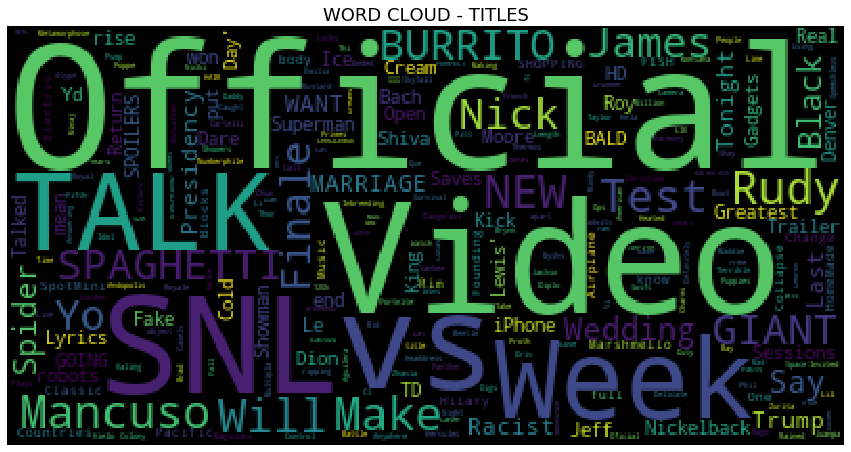

In [59]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_you['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

# Comments Disabled
General Title Word Cloud


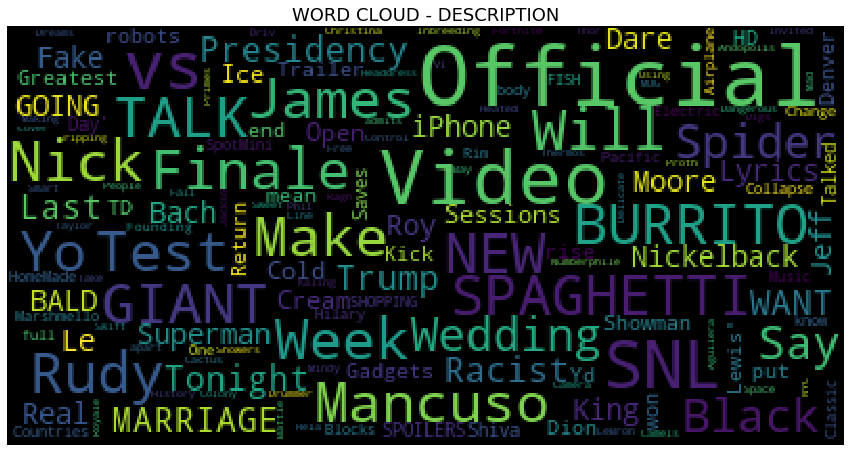

In [60]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_you['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

# Visualizing the WordCloud of Description

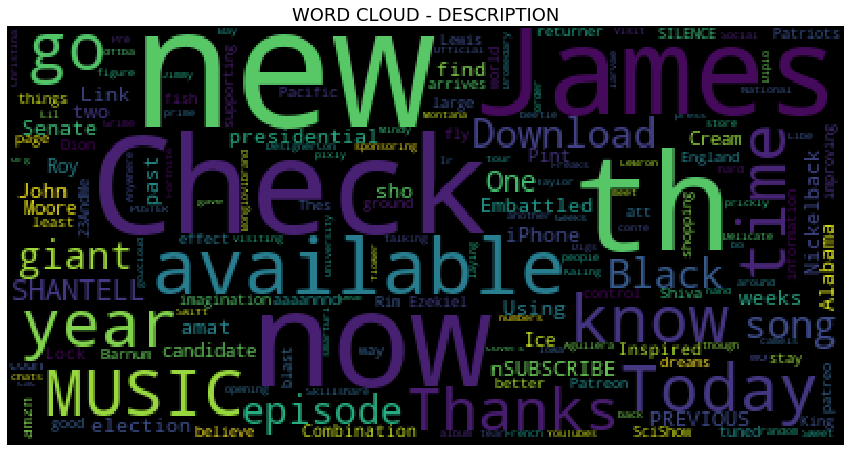

In [61]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']

stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df_you['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

# Analysing the Wordcloud of Tags

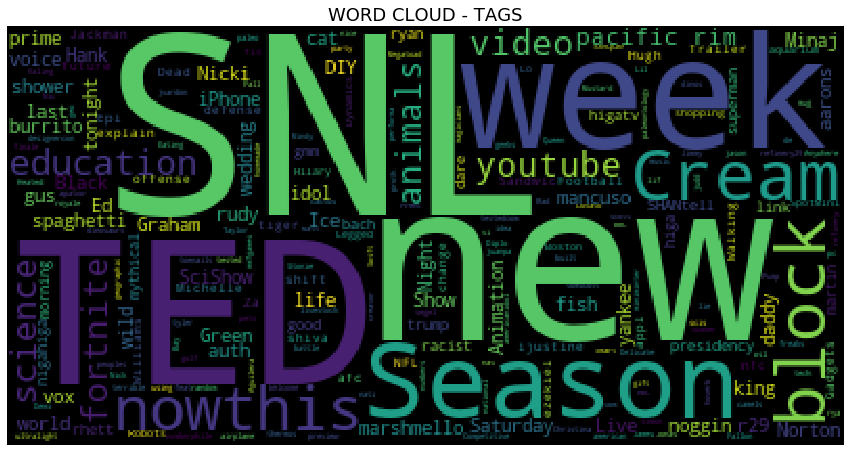

In [62]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_you['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

# learning more about text data!

In [63]:
df_you['publish_time'] = pd.to_datetime(df_you['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Category Name count
5     6681
2     6207
12    6182
3     6175
1     5502
Name: month, dtype: int64


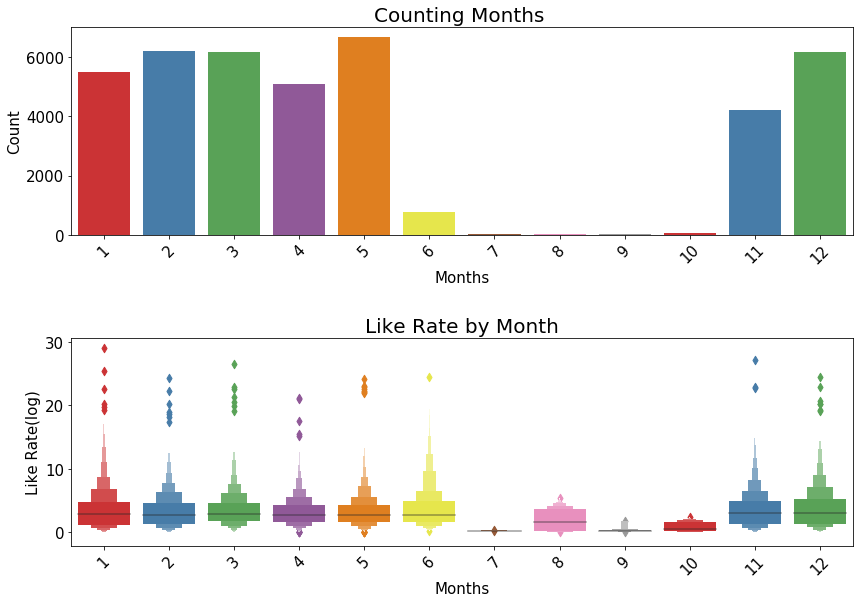

In [64]:
df_you['month'] = df_you['publish_time'].dt.month

print("Category Name count")
print(df_you['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=df_you, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='month', y='like_rate', data=df_you, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Month", fontsize=20)
g1.set_xlabel("Months", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

# Let's extract the hour value of datetime

In [65]:
# separates date and time into two columns from 'publish_time' column
df_you.insert(4, 'publish_date', df_you['publish_time'].dt.date)
df_you['publish_time'] = df_you['publish_time'].dt.time
df_you[['hour','min','sec']] = df_you['publish_time'].astype(str).str.split(':', expand=True).astype(int)

In [66]:
df_you['publish_date'].head(3)

0    2017-11-13
1    2017-11-13
2    2017-11-12
Name: publish_date, dtype: object

# Let's extract the hour value of datetime'
# Knowning the Hour feature

TOP 5 Hour values
16    3669
15    3483
17    3447
18    2889
14    2807
Name: hour, dtype: int64


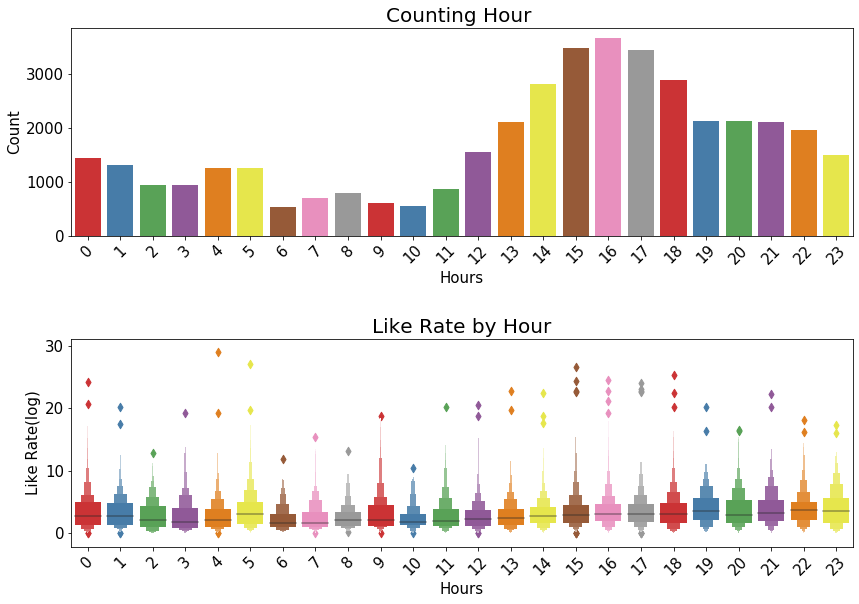

In [67]:
print("TOP 5 Hour values")
print(df_you['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('hour', data=df_you, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='hour', y='like_rate', data=df_you, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)